In [533]:
import pandas as pd
import re
df = pd.read_csv('vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Calculate Sentiment using VADER

In [534]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yzou/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [535]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) 
    #removes stop words
    txt = re.sub(r'the', '', txt)
    txt = re.sub(r'and', '', txt)
    txt = re.sub(r'to', '', txt)
    return txt


df['text'] = df['text'].apply(cleanUpTweet)

In [536]:
df['scores'] = df['text'].apply(lambda review: sid.polarity_scores(review))

df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,scores
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cykine srm PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}"
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While world has been on wrong side of hisry this year, hopefully, biggest vaccination effort we've ev…",NaN,Twitter Web App,1,1,False,"{'neg': 0.149, 'neu': 0.721, 'pos': 0.13, 'compound': -0.1027}"
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid_19 Russian vaccine is created last 2-4 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}"
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senar, even when you're not ethically sturdy enough acknowledge m. (1) You were born i…",NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain me again why we need a vaccine whereareallsickpeople PfizerBioNTech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [537]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])



In [538]:
# label sentiment
df['sentiment'] = df['compound'].apply(lambda c: 'positive' if c>=0.3 else ('negative' if c <= -0.3 else 'neutral'))

df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,scores,compound,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cykine srm PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}",0.4019,positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While world has been on wrong side of hisry this year, hopefully, biggest vaccination effort we've ev…",NaN,Twitter Web App,1,1,False,"{'neg': 0.149, 'neu': 0.721, 'pos': 0.13, 'compound': -0.1027}",-0.1027,neutral
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid_19 Russian vaccine is created last 2-4 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}",0.2500,neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senar, even when you're not ethically sturdy enough acknowledge m. (1) You were born i…",NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain me again why we need a vaccine whereareallsickpeople PfizerBioNTech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [539]:
#df.to_csv("COVIDVaccineTweet+Sentiment.csv")

## Mallet LDA Topic Modeling on Sentiment

In [199]:
#df = pd.read_csv('COVIDVaccineTweet+Sentiment.csv')


/Users/yzou/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [478]:
df.sentiment.value_counts()


neutral     34240
positive    18311
negative    7752 
Name: sentiment, dtype: int64

In [479]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/yzou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [480]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

# WordCloud on Sentiment to have a general view

In [541]:
#!pip install wordninja

from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /Users/yzou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yzou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


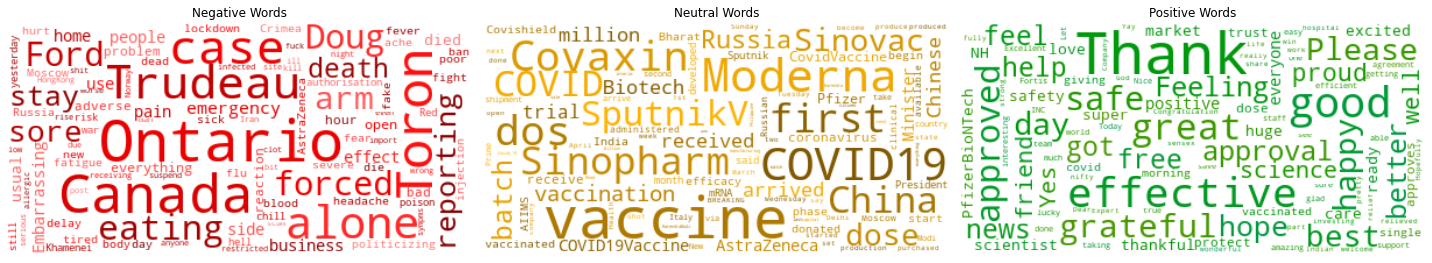

In [542]:
# thanks to Kaggle user twhelan and pawanbhandarkar for the open source code
# link to the source code is as below:
# https://www.kaggle.com/pawanbhandarkar/generate-smarter-word-clouds-with-log-likelihood#Smarter-Word-Clouds


def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud
  
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png")

# Preprocess for LDA on Negative Sentiment

In [483]:
df['text'] = df['text'].fillna('')

data = list(df.text.loc[df['sentiment']=='negative'])
#data = list(df.text.loc[df['sentiment']=='positive'])

#data

## Calculate Coherence to Find Optimal Number of Topics 

In [379]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)
        
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [380]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=30, step=1)

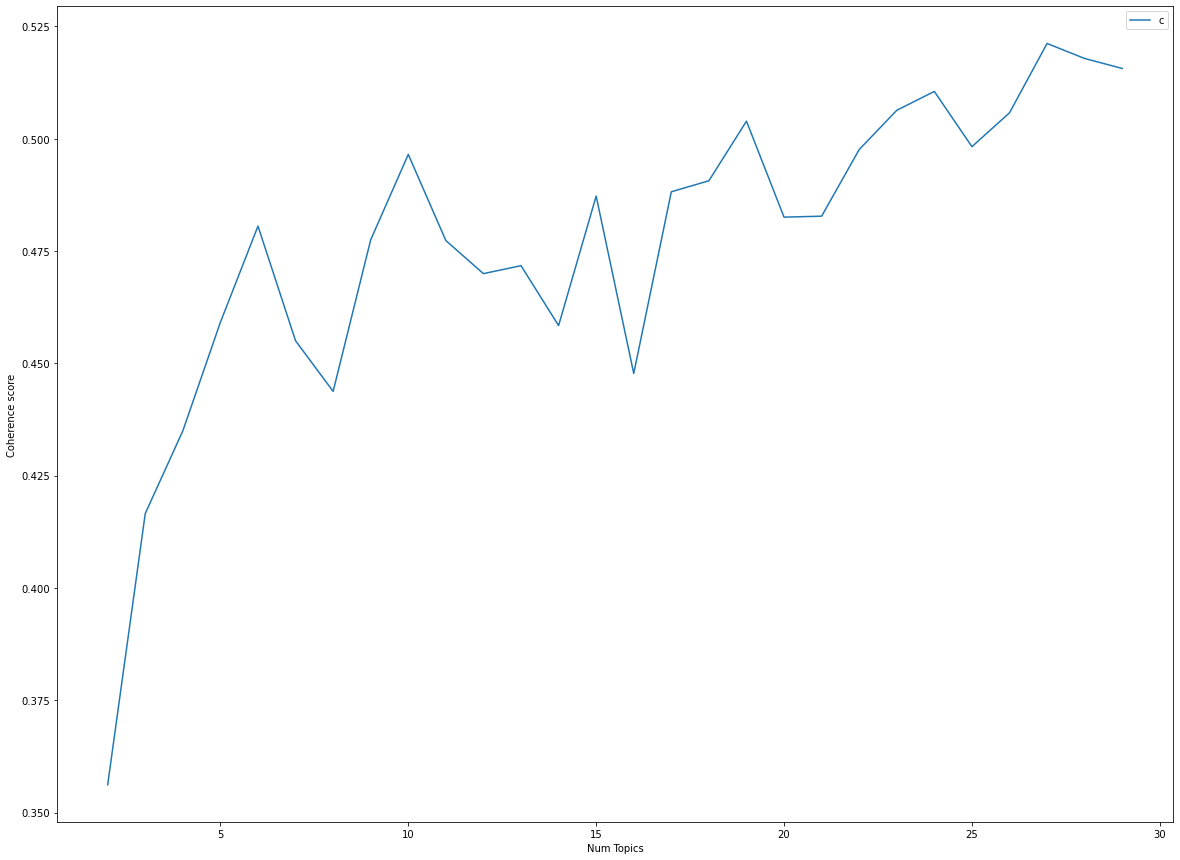

In [381]:
# Show graph of optimal # topics
limit=30; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [382]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3562
Num Topics = 3  has Coherence Value of 0.4166
Num Topics = 4  has Coherence Value of 0.435
Num Topics = 5  has Coherence Value of 0.4592
Num Topics = 6  has Coherence Value of 0.4806
Num Topics = 7  has Coherence Value of 0.455
Num Topics = 8  has Coherence Value of 0.4438
Num Topics = 9  has Coherence Value of 0.4775
Num Topics = 10  has Coherence Value of 0.4965
Num Topics = 11  has Coherence Value of 0.4773
Num Topics = 12  has Coherence Value of 0.47
Num Topics = 13  has Coherence Value of 0.4718
Num Topics = 14  has Coherence Value of 0.4584
Num Topics = 15  has Coherence Value of 0.4872
Num Topics = 16  has Coherence Value of 0.4478
Num Topics = 17  has Coherence Value of 0.4882
Num Topics = 18  has Coherence Value of 0.4907
Num Topics = 19  has Coherence Value of 0.5039
Num Topics = 20  has Coherence Value of 0.4826
Num Topics = 21  has Coherence Value of 0.4828
Num Topics = 22  has Coherence Value of 0.4976
Num Topics = 23  has Cohe

## Applying LDAMallet using Num Topics = 6

In [484]:
# thanks to medium blogger Senol Kurt for the instruction on LDAMallet
# link to the blog is as below:
# https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7

bigram = gensim.models.Phrases(data, min_count=20, threshold=100)
trigram = gensim.models.Phrases(bigram[data], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [485]:

# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# get stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append("amp")

def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out


In [486]:
data_ready = process_words(data)


In [487]:
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 5550


In [488]:
corpus = [id2word.doc2bow(text) for text in data_ready]


In [489]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq
       
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

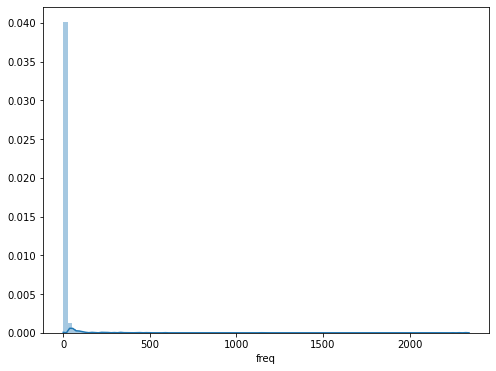

In [490]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [491]:
dict_df.sort_values('freq', ascending=False).head(10)


,freq
vaccine,2342
covid,1150
get,862
case,591
day,486
use,486
people,458
dose,447
alone,434
eat,434


In [492]:
extension = dict_df[dict_df.freq>1500].index.tolist()


In [493]:
ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
id2word.filter_tokens(bad_ids=ids)

In [494]:
# add high frequency words to stop words list
stop_words.extend(extension)
# rerun the process_words function
data_ready = process_words(data)
# recreate Dictionary
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))


Total Vocabulary Size: 5575


In [495]:
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
id2word.filter_extremes(no_below=10, no_above=0.5)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 746


In [496]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

### Start Mallet LDA

In [497]:
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip


In [498]:
#!unzip mallet-2.0.8.zip


In [499]:
mallet_path = '/Users/yzou/Downloads/mallet-2.0.8/bin/mallet'


In [500]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip


ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=6, id2word=id2word)


In [501]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('report', 0.06725993377483444),
   ('death', 0.06167218543046358),
   ('people', 0.05856788079470199),
   ('business', 0.05504966887417218),
   ('open', 0.04842715231788079),
   ('receive', 0.04552980132450331),
   ('usual', 0.04470198675496689),
   ('ontario', 0.030215231788079472),
   ('reaction', 0.028145695364238412),
   ('vaccinate', 0.02669701986754967)]),
 (1,
  [('dose', 0.059343434343434344),
   ('bad', 0.04482323232323232),
   ('vaccination', 0.03787878787878788),
   ('people', 0.036826599326599326),
   ('shot', 0.036616161616161616),
   ('time', 0.026094276094276093),
   ('year', 0.025042087542087543),
   ('blood', 0.02377946127946128),
   ('fight', 0.01936026936026936),
   ('low', 0.016414141414141416)]),
 (2,
  [('emergency', 0.06976744186046512),
   ('make', 0.048938321536905964),
   ('covaxin', 0.0487360970677452),
   ('country', 0.0487360970677452),
   ('sputnikv', 0.0378159757330637),
   ('week', 0.024266936299292215),
   ('approve', 0.022851365015166835),
   

In [502]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)


Coherence Score:  0.4882228689894979


In [503]:
import pickle
pickle.dump(ldamallet, open("/Users/yzou/Downloads/ldamallet.pkl", "wb"))

In [504]:
ldamallet = pickle.load(open("/Users/yzou/Downloads/ldamallet.pkl", "rb"))


In [512]:
tm_results = ldamallet[corpus]


In [513]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]


In [514]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]


In [515]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Term1,report,dose,emergency,covid,day,eat
Term2,death,bad,make,case,arm,force
Term3,people,vaccination,covaxin,embarrassing,effect,pfizerbiontech
Term4,business,people,country,reporting,sore,die
Term5,open,shot,sputnikv,covidvaccine,side,stay


In [516]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-516-22448409583d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Terms per Topic
Topic1,"report, death, people, business, open, receive, usual, ontario, reaction, vaccinate, adverse, severe, poor, kill, good, suffer, crimea, show, health, rise"
Topic2,"dose, bad, vaccination, people, shot, time, year, blood, fight, night, low, clot, fail, sick, lie, fear, dead, find, issue, datum"
Topic3,"emergency, make, covaxin, country, sputnikv, week, approve, problem, suspend, efficacy, authorisation, virus, russian, reject, trial, due, safe, authorize, world, test"
Topic4,"covid, case, embarrassing, reporting, covidvaccine, politicize, government, risk, start, develop, news, long, close, call, variant, worry, order, patient, infect, war"
Topic5,"day, arm, effect, sore, side, shoot, feel, hour, pain, dose, yesterday, hurt, injection, vaccinated, body, ache, fever, tired, site, update"
Topic6,"eat, force, pfizerbiontech, die, stay, home, give, ban, steal, oil, lockdown, wait, fake, work, announce, import, thing, poison, refuse, absolutely"


### WordClouds

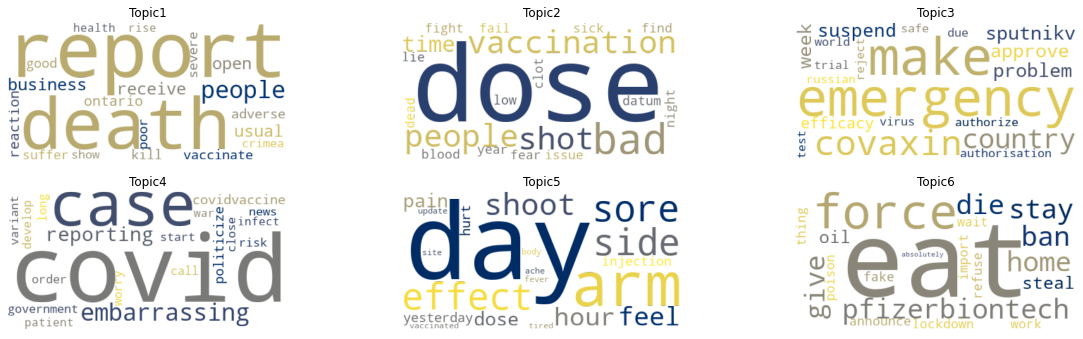

In [530]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", colormap='cividis', max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(6):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

### pyLDAvis

In [1]:
from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [2]:
ldagensim = convertldaMalletToldaGen(ldamallet)

NameError: name 'ldamallet' is not defined

In [ ]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

### Dominant topics for each document for Tableau Viz

In [521]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Post Date'] = df.date.loc[df['sentiment']=='negative']
corpus_topic_df['polarity'] = df.compound.loc[df['sentiment']=='negative']
corpus_topic_df['text'] = df.text.loc[df['sentiment']=='negative']
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

,Post Date,polarity,text,Dominant Topic,Contribution %,Topic Terms
18,2020-12-12 15:27:42,-0.3919,. will rake in billions from its expensive CovidVaccine but refuses cut price for lowe…,6,18.93,"eat, force, pfizerbiontech, die, stay, home, give, ban, steal, oil, lockdown, wait, fake, work, announce, import, thing, poison, refuse, absolutely"
30,2020-12-12 14:04:37,-0.3599,"6 deaths so far. \nIt's only death, nothing worry about n 🤔\nCovidVaccines\nPfizervaccine…",1,18.79,"report, death, people, business, open, receive, usual, ontario, reaction, vaccinate, adverse, severe, poor, kill, good, suffer, crimea, show, health, rise"
31,2020-12-12 13:56:01,-0.5093,Please don’t spread fake news! There is no evidence that se cases are linked …,4,22.02,"covid, case, embarrassing, reporting, covidvaccine, politicize, government, risk, start, develop, news, long, close, call, variant, worry, order, patient, infect, war"
36,2020-12-12 12:26:34,-0.4019,"The FDA finally issues EUA now comes problem transporting this PfizerBioNTech vaccine, needs be kept at -…",1,17.28,"report, death, people, business, open, receive, usual, ontario, reaction, vaccinate, adverse, severe, poor, kill, good, suffer, crimea, show, health, rise"
44,2020-12-12 11:55:28,-0.3818,FDA authorizes PfizerBioNTech coronavirus vaccine for emergency use\n,3,19.50,"emergency, make, covaxin, country, sputnikv, week, approve, problem, suspend, efficacy, authorisation, virus, russian, reject, trial, due, safe, authorize, world, test"


In [522]:
corpus_topic_df.to_csv("negative polarity LDA.csv")